# Eucledian distance between random points in a hypercube

**References:**
- http://mathworld.wolfram.com/HypercubeLinePicking.html
- https://www.coursera.org/learn/guided-tour-machine-learning-finance/notebook/rsGVU/euclidean-distance-calculation
- https://math.stackexchange.com/questions/1976842/how-is-the-distance-of-two-random-points-in-a-unit-hypercube-distributed

\begin{equation}
    \Delta(d)
    =
    \int_{0}^{1}
    \int_{0}^{1}
    ...
    \int_{0}^{1}
    \sqrt{ (x_{1} - y_{1})^2 + (x_{2}-y_{2})^{2} + ... + (x_{n} - y_{n})^2 }
    dx_{1}
    ...
    dx_{n}
    dy_{1}
    ...
    dy_{n}
\end{equation}

Wolfram:
> This multiple integral has been evaluated analytically only for small values of $d$. The case $\Delta(d=1)$ corresponds to the line line picking between two random points in the interval [0,1]. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def eucledian_distances_uniform_points(lower_boundary, upper_boundary, dimension, sample_size=10000):
    X = np.random.uniform( low=lower_boundary, high=upper_boundary, size=(sample_size, dimension) )
    Y = np.random.uniform( low=lower_boundary, high=upper_boundary, size=(sample_size, dimension) )
    eucledian_distances = np.sqrt( np.sum((X-Y)**2, axis=1))
    return eucledian_distances

In [3]:
lower_boundary = 0.0
upper_boundary = 1.0
sample_size = 10000

In [4]:
dimensions = [int(d) for d in np.logspace(0, 3, num=10)]
dimensions

[1, 2, 4, 10, 21, 46, 100, 215, 464, 1000]

In [5]:
dim_eucledian_distances = [eucledian_distances_uniform_points(lower_boundary, upper_boundary, d, sample_size) for d in dimensions]

Text(0,0.5,'Mean of eucledian distances')

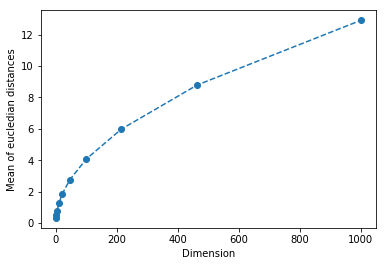

In [6]:
f,ax = plt.subplots()
ax.scatter(dimensions, np.mean(dim_eucledian_distances, axis=1))
ax.plot(dimensions, np.mean(dim_eucledian_distances, axis=1), linestyle='--')
ax.set_xlabel("Dimension")
ax.set_ylabel("Mean of eucledian distances")

------

## Test area

In [7]:
X = np.random.uniform( low=lower_boundary, high=upper_boundary, size=(sample_size, 1) )
Y = np.random.uniform( low=lower_boundary, high=upper_boundary, size=(sample_size, 1) )

In [8]:
np.mean((X-Y)**2)

0.16455179766885838

In [9]:
np.sum(dim_eucledian_distances[0])

3369.3188939102938